# Final Project

### Github link -> https://github.com/KyriakiPot/ML---Rock-Paper-Scissors/tree/main

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
import random

In [2]:
width = 300
height = 200
p1 = 0.5
p2 = 0.5
random_state = 0
#number of games
N = 100

## Load and preprocess images

In [4]:
def load_images(folder_path, image_size):
    images = []
    labels = []

    class_names = ['rock', 'scissors', 'paper']
    
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        print(f'current class_path is {class_path}')

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Read the image
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image to 30x30
            image = cv2.resize(image, image_size)

            # Normalize pixel values to be between 0 and 1
            image = image / 255.0
            
            # Flatten the 2D array to 1D
            image_vector = image.flatten()

            # Append the image to the list
            images.append(image_vector)

            # Append the label for the current class
            labels.append(label)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [5]:
folder_path = 'dataset'
images, labels = load_images(folder_path, (width,height))

current class_path is dataset\rock
current class_path is dataset\scissors
current class_path is dataset\paper


In [6]:
images.shape

(2188, 60000)

In [7]:
def findImageFromLabel(images, labels, label):
    indices = np.where(labels == label)[0]
    selected_images = images[indices]
    selected_labels = labels[indices]
    
    return train_test_split(selected_images, selected_labels, test_size=0.2, random_state=0)

In [8]:
X_train_scissors, X_test_scissors, y_train_scissors, y_test_scissors = findImageFromLabel(images, labels, 1)
X_train_rock, X_test_rock, y_train_rock, y_test_rock = findImageFromLabel(images, labels, 0)
X_train_paper, X_test_paper, y_train_paper, y_test_paper = findImageFromLabel(images, labels, 2)

#Split train and test set
X_train = [] 
X_test = [] 
y_train = [] 
y_test = []
X_all = []

X_train.extend(X_train_scissors)
X_train.extend(X_train_rock)
X_train.extend(X_train_paper)

X_test.extend(X_test_scissors)
X_test.extend(X_test_rock)
X_test.extend(X_test_paper)

y_train.extend(y_train_scissors)
y_train.extend(y_train_rock)
y_train.extend(y_train_paper)

y_test.extend(y_test_scissors)
y_test.extend(y_test_rock)
y_test.extend(y_test_paper)

X_all.extend(X_train)
X_all.extend(X_test)

len(X_train), len(X_test), len(y_train), len(y_test), len(X_all)

(1749, 439, 1749, 439, 2188)

## Dimensionality reduction

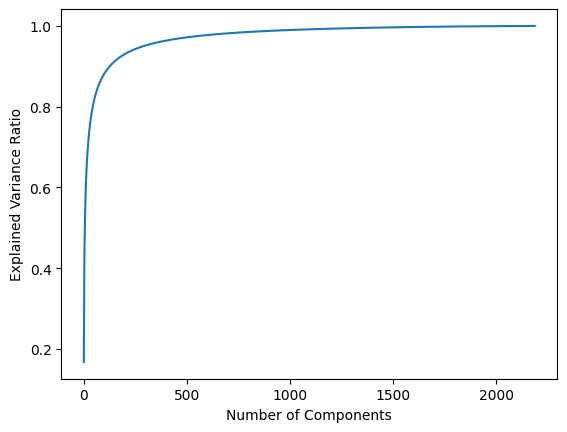

In [9]:
# Apply PCA for dimensionality reduction
pca = PCA()
images_pca = pca.fit_transform(X_all)

# Visualize explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
def applyPca(image_dataset, num_components):
    # Apply PCA for dimensionality reduction and choose num of components based on explained variance ratio
    pca = PCA(n_components=num_components)
    images_pca = pca.fit_transform(image_dataset)

    # Visualize explained variance ratio
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(explained_variance_ratio)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

    return images_pca

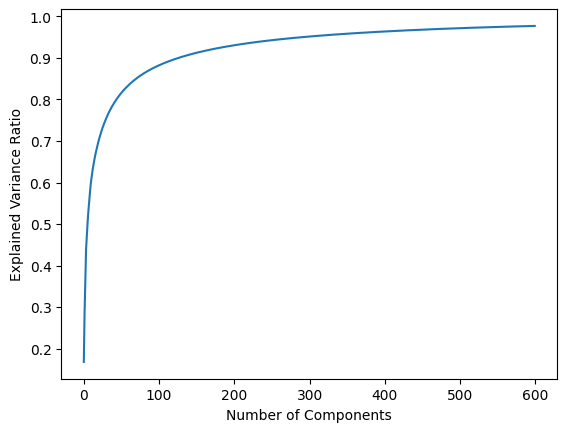

In [11]:
num_components = 600  
X_all_pca = applyPca(X_all, num_components)

In [12]:
split_index = int(0.8 * len(X_all_pca)) - 1

X_train_pca = X_all_pca[:split_index]
X_test_pca = X_all_pca[split_index:]

len(X_train_pca), len(X_test_pca)

(1749, 439)

## Apply models

In [13]:
def applyModel(X_train, X_test, y_train, y_test, model): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [278]:
#Logistic regression
logistic_reg_param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

logistic_reg_model = LogisticRegression(random_state=random_state)

logistic_reg_search = GridSearchCV(logistic_reg_model, logistic_reg_param, cv=5)

lr_accuracy, lr_precision, lr_recall, lr_f1 = applyModel(X_train_pca, X_test_pca, y_train, y_test, logistic_reg_search)

print(f'Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%')
print(f'Logistic Regression Precision: {lr_precision * 100:.2f}%')
print(f'Logistic Regression Recall: {lr_recall * 100:.2f}%')
print(f'Logistic Regression F1: {lr_f1 * 100:.2f}%')

print(f'Best Parameters: {logistic_reg_search.best_params_}')

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model

Logistic Regression Accuracy: 74.94%
Logistic Regression Precision: 74.95%
Logistic Regression Recall: 74.94%
Logistic Regression F1: 74.91%
Best Parameters: {'C': 0.01, 'solver': 'newton-cholesky'}


In [279]:
# Random Forest
random_forest_param = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy', 'log_loss']
}

random_forest_search = GridSearchCV(RandomForestClassifier(random_state=random_state), random_forest_param, cv=10)

rf_accuracy, rf_precision, rf_recall, rf_f1 = applyModel(X_train_pca, X_test_pca, y_train, y_test, random_forest_search)

print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Random Forest Precision: {rf_precision * 100:.2f}%')
print(f'Random Forest Recall: {rf_recall * 100:.2f}%')
print(f'Random Forest F1: {rf_f1 * 100:.2f}%')

print(f'Best Parameters: {random_forest_search.best_params_}')

Random Forest Accuracy: 87.70%
Random Forest Precision: 87.79%
Random Forest Recall: 87.70%
Random Forest F1: 87.70%
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}


In [280]:
# SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svm_grid_search = GridSearchCV(SVC(random_state=random_state), svm_param_grid, cv=10)
svm_accuracy, svm_precision, svm_recall, svm_f1 = applyModel(X_train_pca, X_test_pca, y_train, y_test, svm_grid_search)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print(f'SVM Precision: {svm_precision * 100:.2f}%')
print(f'SVM Recall: {svm_recall * 100:.2f}%')
print(f'SVM F1: {svm_f1 * 100:.2f}%')

print(f'Best Parameters: {svm_grid_search.best_params_}')

SVM Accuracy: 89.52%
SVM Precision: 90.13%
SVM Recall: 89.52%
SVM F1: 89.53%
Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}


In [281]:
k_squared = np.sqrt(len(X_train_pca))
k_rounded = np.round(k_squared).astype(int)

# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [10, 20, k_rounded],
    'weights': ['uniform', 'distance']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10)

knn_accuracy, knn_precision, knn_recall, knn_f1 = applyModel(X_train_pca, X_test_pca, y_train, y_test, knn_grid_search)

print(f'Random Forest Accuracy: {knn_accuracy * 100:.2f}%')
print(f'Random Forest Precision: {knn_precision * 100:.2f}%')
print(f'Random Forest Recall: {knn_recall * 100:.2f}%')
print(f'Random Forest F1: {knn_f1 * 100:.2f}%')

print(f'Best Parameters: {knn_grid_search.best_params_}')

Random Forest Accuracy: 87.70%
Random Forest Precision: 88.52%
Random Forest Recall: 87.70%
Random Forest F1: 87.74%
Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}


In [15]:
# Number of classes
num_classes = len(np.unique(y_train))

# Convert labels to one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

# Shape depends on the PCA
input_shape = (num_components, 1, 1)

# Set the random seed for TensorFlow
from tensorflow.python.framework import random_seed
random_seed.set_seed(0)

In [16]:
# Create a Convolutional Neural Network
cnn_model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 1)),
    layers.Conv2D(64, kernel_size=(3, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='huber', metrics=['accuracy'])
cnn_model.summary()

# Train the CNN model
cnn_model.fit(X_train_pca[..., np.newaxis], y_train_one_hot, epochs=100, validation_split=0.2)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_pca[..., np.newaxis], y_test_one_hot)
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 1, 32)        128       
                                                                 
 max_pooling2d (MaxPooling2  (None, 299, 1, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 1, 64)        6208      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 148, 1, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 9472)              0         
                                                                 
 dense (Dense)               (None, 128)             

## Ensemble CNN models

In [17]:
def create_model(seed):
    random_seed.set_seed(seed)
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 1)),
        layers.Conv2D(64, kernel_size=(3, 1), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])  
    model.compile(optimizer='adam', loss='huber', metrics=['accuracy'])
    return model

num_models = 5

#Create models
models_list = [create_model(seed) for seed in range(num_models)]

#Train models
for i, model in enumerate(models_list):
    model.fit(X_train_pca[..., np.newaxis], y_train_one_hot, epochs=60, validation_split=0.2)


Epoch 1/60
44/44 [==============================] - 1s 10ms/step - loss: 0.0765 - accuracy: 0.6805 - val_loss: 0.0945 - val_accuracy: 0.5771
Epoch 2/60
44/44 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 0.9006 - val_loss: 0.0907 - val_accuracy: 0.6229
Epoch 3/60
44/44 [==============================] - 0s 7ms/step - loss: 0.0152 - accuracy: 0.9514 - val_loss: 0.0393 - val_accuracy: 0.8571
Epoch 4/60
44/44 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9786 - val_loss: 0.0577 - val_accuracy: 0.7971
Epoch 5/60
44/44 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.9921 - val_loss: 0.0448 - val_accuracy: 0.8371
Epoch 6/60
44/44 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.9950 - val_loss: 0.0528 - val_accuracy: 0.8057
Epoch 7/60
44/44 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 0.9950 - val_loss: 0.0436 - val_accuracy: 0.8400
Epoch 8/60
44/44 [=

In [18]:
#Make predictions for each model
predictions_list = [model.predict(X_test_pca[..., np.newaxis]) for model in models_list]

#Ensemble predictions
ensemble_predictions = np.argmax(np.sum(predictions_list, axis=0), axis=1)

accuracy_majority_vote = np.sum(ensemble_predictions == y_test) / len(y_test)
print(f'Ensemble CNN Accuracy: {accuracy_majority_vote * 100:.2f}%')

14/14 [==============================] - 0s 3ms/step
Ensemble CNN Accuracy: 94.08%


In [286]:
# Create a Deep Neural Network
dnn_model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
dnn_model.summary()

# Train the CNN model
dnn_model.fit(X_train_pca[..., np.newaxis], y_train_one_hot, epochs=60, validation_split=0.2)

# Evaluate the CNN model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test_pca[..., np.newaxis], y_test_one_hot)
print(f'DNN Accuracy: {dnn_accuracy * 100:.2f}%')

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 600)               0         
                                                                 
 dense_110 (Dense)           (None, 128)               76928     
                                                                 
 dense_111 (Dense)           (None, 64)                8256      
                                                                 
 dense_112 (Dense)           (None, 3)                 195       
                                                                 
Total params: 85379 (333.51 KB)
Trainable params: 85379 (333.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
44/44 [==============================] - 1s 4ms/step - loss: 0.8793 - accuracy: 0.6283 - val_loss: 1.3524 - val_accuracy: 0.3714
Epoch 2

## Vertical and Horizontal Flip

In [19]:
def apply_flips(image, p1, p2):
    image_like_structure = image.reshape((20, 30))

    # Apply horizontal flip with probability p1
    if np.random.rand() < p1:
        image = cv2.flip(image_like_structure, 1).flatten()

    # Apply vertical flip with probability p2
    if np.random.rand() < p2:
        image = cv2.flip(image_like_structure, 0).flatten()

    return image

In [20]:
def add_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, image.shape)
    return np.clip(image + noise, 0, 1)

## Select Random Image

In [21]:
def get_random_image(images, labels):
    random_index = random.randint(0, len(images) - 1)

    random_image = images[random_index]
    random_label = labels[random_index]

    return random_image, random_label

## Predict Label

In [38]:
def predictImageLabel(random_image, random_label):    
    if len(random_image) <= 0:
        random_image, random_label = get_random_image(X_test_pca, y_test)
    image_with_flips = apply_flips(random_image, p1, p2)
    image_with_flips_noise = apply_flips(image_with_flips, p1, p2)

    image_with_flips_noise = image_with_flips_noise.reshape((1, 600, 1, 1))

    # Predict the label using the trained CNN model
    prediction = cnn_model.predict(image_with_flips_noise)

    # Get the predicted label (index with the maximum probability)
    predicted_label = np.argmax(prediction)

    return random_label, predicted_label


In [23]:
def findBestMove(predicted_label):
    if(predicted_label == 0):
        return 2
    elif(predicted_label == 1):
        return 0
    else:
        return 1

In [39]:
gain = 0
gain_list = []

for i in range(N):
    actual_label, predicted_label = predictImageLabel([], None)
    best_move = findBestMove(predicted_label)

    if((actual_label == 0 and best_move == 2) or (actual_label == 1 and best_move == 0) or (actual_label == 2 and best_move == 1)):
        gain += 2
    elif(actual_label != best_move): 
        gain -= 1
    
    gain_list.append(gain)

    print(f"Actual label: {actual_label}, Predicted label: {predicted_label}, Best move: {best_move}")
print(f"Total gain: {gain}")

1/1 [==============================] - 0s 17ms/step
Actual label: 0, Predicted label: 0, Best move: 2
1/1 [==============================] - 0s 19ms/step
Actual label: 0, Predicted label: 0, Best move: 2
1/1 [==============================] - 0s 16ms/step
Actual label: 0, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 16ms/step
Actual label: 1, Predicted label: 1, Best move: 0
1/1 [==============================] - 0s 16ms/step
Actual label: 0, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 18ms/step
Actual label: 1, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 16ms/step
Actual label: 0, Predicted label: 0, Best move: 2
1/1 [==============================] - 0s 16ms/step
Actual label: 0, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 16ms/step
Actual label: 1, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 16ms/step
Actual label: 2, Predicted lab

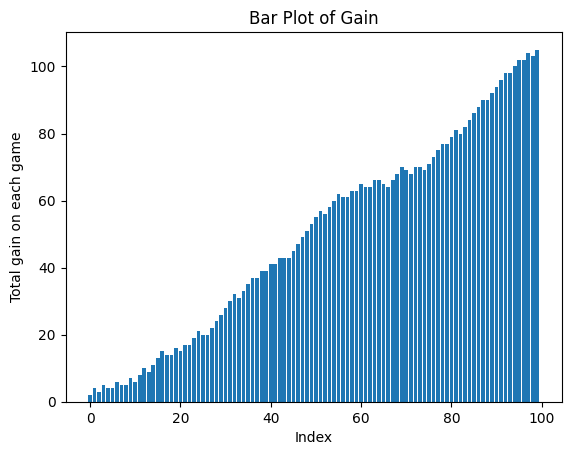

In [40]:
plt.bar(range(len(gain_list)), gain_list)
plt.xlabel('Index')
plt.ylabel('Total gain on each game')
plt.title('Bar Plot of Gain')
plt.show()

## Test images outside the dataset

In [62]:
folder_path = 'dataset/test'
images, labels = load_images(folder_path, (width,height))
images, labels

gain = 0
gain_list = []
n_components = 600

for i in range(len(images)):
    image = cv2.resize(images[i], (20,30))
    actual_label, predicted_label = predictImageLabel(image, labels[i])
    best_move = findBestMove(predicted_label)

    if((actual_label == 0 and best_move == 2) or (actual_label == 1 and best_move == 0) or (actual_label == 2 and best_move == 1)):
        gain += 2
    elif(actual_label != best_move): 
        gain -= 1
    
    gain_list.append(gain)

    print(f"Actual label: {actual_label}, Predicted label: {predicted_label}, Best move: {best_move}")
print(f"Total gain: {gain}")

current class_path is dataset/test\rock
current class_path is dataset/test\scissors
current class_path is dataset/test\paper
1/1 [==============================] - 0s 16ms/step
Actual label: 0, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 15ms/step
Actual label: 1, Predicted label: 2, Best move: 1
1/1 [==============================] - 0s 16ms/step
Actual label: 2, Predicted label: 2, Best move: 1
Total gain: 1
